In [39]:
import pandas as pd

# تحميل الملفات المطلوبة فقط
orders = pd.read_csv("/home/rema/code/Alanoudis/food-delivery-rec/raw_data/data_sg/orders_sg10k.txt")
vendors = pd.read_csv("/home/rema/code/Alanoudis/food-delivery-rec/raw_data/data_sg/vendors_sg.txt")

# الاحتفاظ فقط بالبائعين الموجودين في orders_sg10k
filtered_vendors = vendors[vendors['vendor_id'].isin(orders['vendor_id'])]

# save new file
df= filtered_vendors.to_csv("filtered_vendors.csv", index=False)


In [40]:
#Number of vendors before filtering: 7411
print("عدد البائعين قبل التصفية:", vendors.shape[0])


عدد البائعين قبل التصفية: 7411


In [ ]:
#Number of vendors after filtering: 7411
print("عدد البائعين بعد التصفية:", filtered_vendors.shape[0])


عدد البائعين بعد التصفية: 2351


In [42]:
filtered_vendors.to_csv("filtered_vendors.csv", index=False)

print("filtered_vendors.csv")


filtered_vendors.csv


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load
orders = pd.read_csv("/home/rema/code/Alanoudis/food-delivery-rec/raw_data/data_sg/orders_sg10k.txt")
vendors = pd.read_csv("filtered_vendors.csv")   # الملف اللي كتبتيه

# quick look
print("orders shape:", orders.shape)
print("vendors shape:", vendors.shape)
display(orders.head())
display(vendors.head())


orders shape: (10001, 9)
vendors shape: (2351, 5)


,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days
3,3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days
4,4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days


,Unnamed: 0,vendor_id,chain_id,geohash,primary_cuisine
0,5,3613129a,8984acb6,w23b1,italian
1,23,38e8b991,65a826c9,w21zk,ayam penyet
2,24,b188c130,e02bff64,w21zu,bak kut teh
3,33,bfe011f8,944f6121,w23b4,ayam penyet
4,34,0577db86,944f6121,w21zt,ayam penyet


In [47]:
# dtypes
print(orders.dtypes)
print("\nNumeric summary:")
display(orders.describe(include='number').T)

print("\nCategorical summary (top values):")
display(orders.describe(include='object').T)


Unnamed: 0      int64
customer_id    object
geohash        object
order_id        int64
vendor_id      object
product_id     object
day_of_week     int64
order_time     object
order_day      object
dtype: object

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10001.0,5000.000000,2887.184355,0.0,2500.0,5000.0,7500.0,10000.0
order_id,10001.0,2419.860114,1403.026996,0.0,1222.0,2450.0,3620.0,4801.0
day_of_week,10001.0,3.311669,2.003286,0.0,2.0,4.0,5.0,6.0



Categorical summary (top values):


,count,unique,top,freq
customer_id,10001,1072,857c695baa,182
geohash,10001,28,w21zu,1148
vendor_id,10001,2351,d9c749be,81
product_id,10001,7594,2e6adf715559,32
order_time,10001,4565,17:14:31,17
order_day,10001,91,35 days,182


In [60]:
# عدد الطلبات لكل بائع
orders_per_vendor = orders.groupby('vendor_id').size().reset_index(name='num_orders')

# دمج بيانات البائعين مع عدد الطلبات
vendor_analysis = pd.merge(vendors, orders_per_vendor, on='vendor_id', how='left')

# عرض أول القيم
vendor_analysis.head()


,Unnamed: 0,vendor_id,chain_id,geohash,primary_cuisine,num_orders
0,5,3613129a,8984acb6,w23b1,italian,14
1,23,38e8b991,65a826c9,w21zk,ayam penyet,1
2,24,b188c130,e02bff64,w21zu,bak kut teh,5
3,33,bfe011f8,944f6121,w23b4,ayam penyet,1
4,34,0577db86,944f6121,w21zt,ayam penyet,3


In [59]:
# عدد الطلبات لكل نوع مطبخ
cuisine_orders = vendor_analysis.groupby('primary_cuisine')['num_orders'].sum().reset_index()

# ترتيب حسب الأكثر طلبًا
cuisine_orders = cuisine_orders.sort_values(by='num_orders', ascending=False)

# عرض أول النتائج
print("Top cuisines by orders:")
display(cuisine_orders.head(10))


Top cuisines by orders:


,primary_cuisine,num_orders
13,chinese,1126
31,indian,624
16,dessert,506
45,noodles,489
8,bubble tea,442
14,coffee,420
35,japanese,389
58,singaporean,347
41,mala xiang guo,343
17,dim sum,323


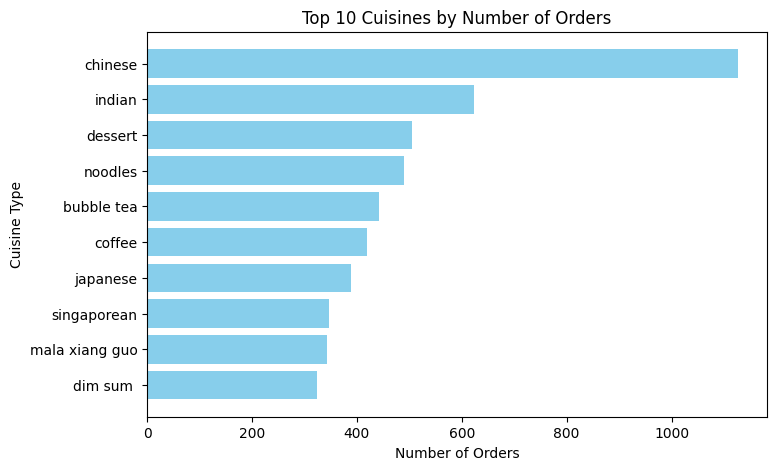

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(cuisine_orders['primary_cuisine'].head(10), cuisine_orders['num_orders'].head(10), color='skyblue')
plt.gca().invert_yaxis()  # عشان الأعلى يكون في الأعلى
plt.title('Top 10 Cuisines by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()


In [54]:
# عدد الطلبات حسب المنطقة
geo_orders = orders.groupby('geohash').size().reset_index(name='num_orders')
geo_orders = geo_orders.sort_values(by='num_orders', ascending=False)

print("Top active locations:")
display(geo_orders.head(10))


Top active locations:


,geohash,num_orders
19,w21zu,1148
5,w21z6,903
12,w21ze,832
24,w23b4,804
6,w21z7,705
18,w21zt,682
14,w21zg,665
7,w21z8,606
17,w21zs,554
15,w21zk,515


⏰ Number of orders per hour:


,hour,num_orders
0,0,127
1,1,46
2,2,49
3,3,21
4,4,21
5,5,32
6,6,15
7,7,77
8,8,249
9,9,358


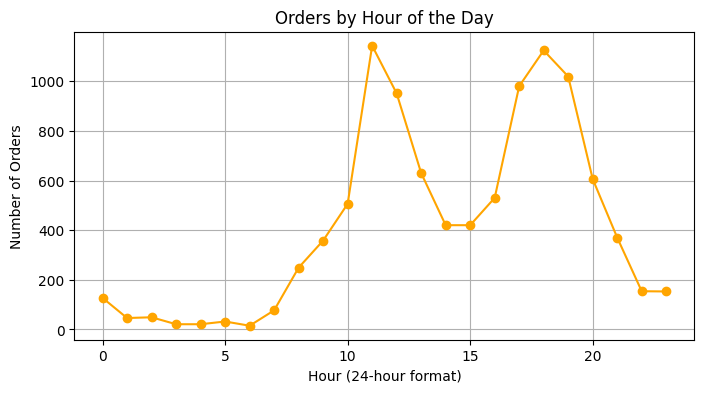

In [61]:
# تحويل عمود order_time إلى ساعات
orders['hour'] = pd.to_datetime(orders['order_time'], format='%H:%M:%S').dt.hour

# نحسب عدد الطلبات لكل ساعة
orders_by_hour = orders.groupby('hour').size().reset_index(name='num_orders')

# نطبع
print("⏰ Number of orders per hour:")
display(orders_by_hour)

# نرسم الرسم الزمني
plt.figure(figsize=(8,4))
plt.plot(orders_by_hour['hour'], orders_by_hour['num_orders'], marker='o', color='orange')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()
